In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [2]:
import pandas as pd
data1 = pd.read_csv(filepath_or_buffer = 'clean_data_num.csv')
data2 = pd.read_csv(filepath_or_buffer = 'clean_data_cat.csv')

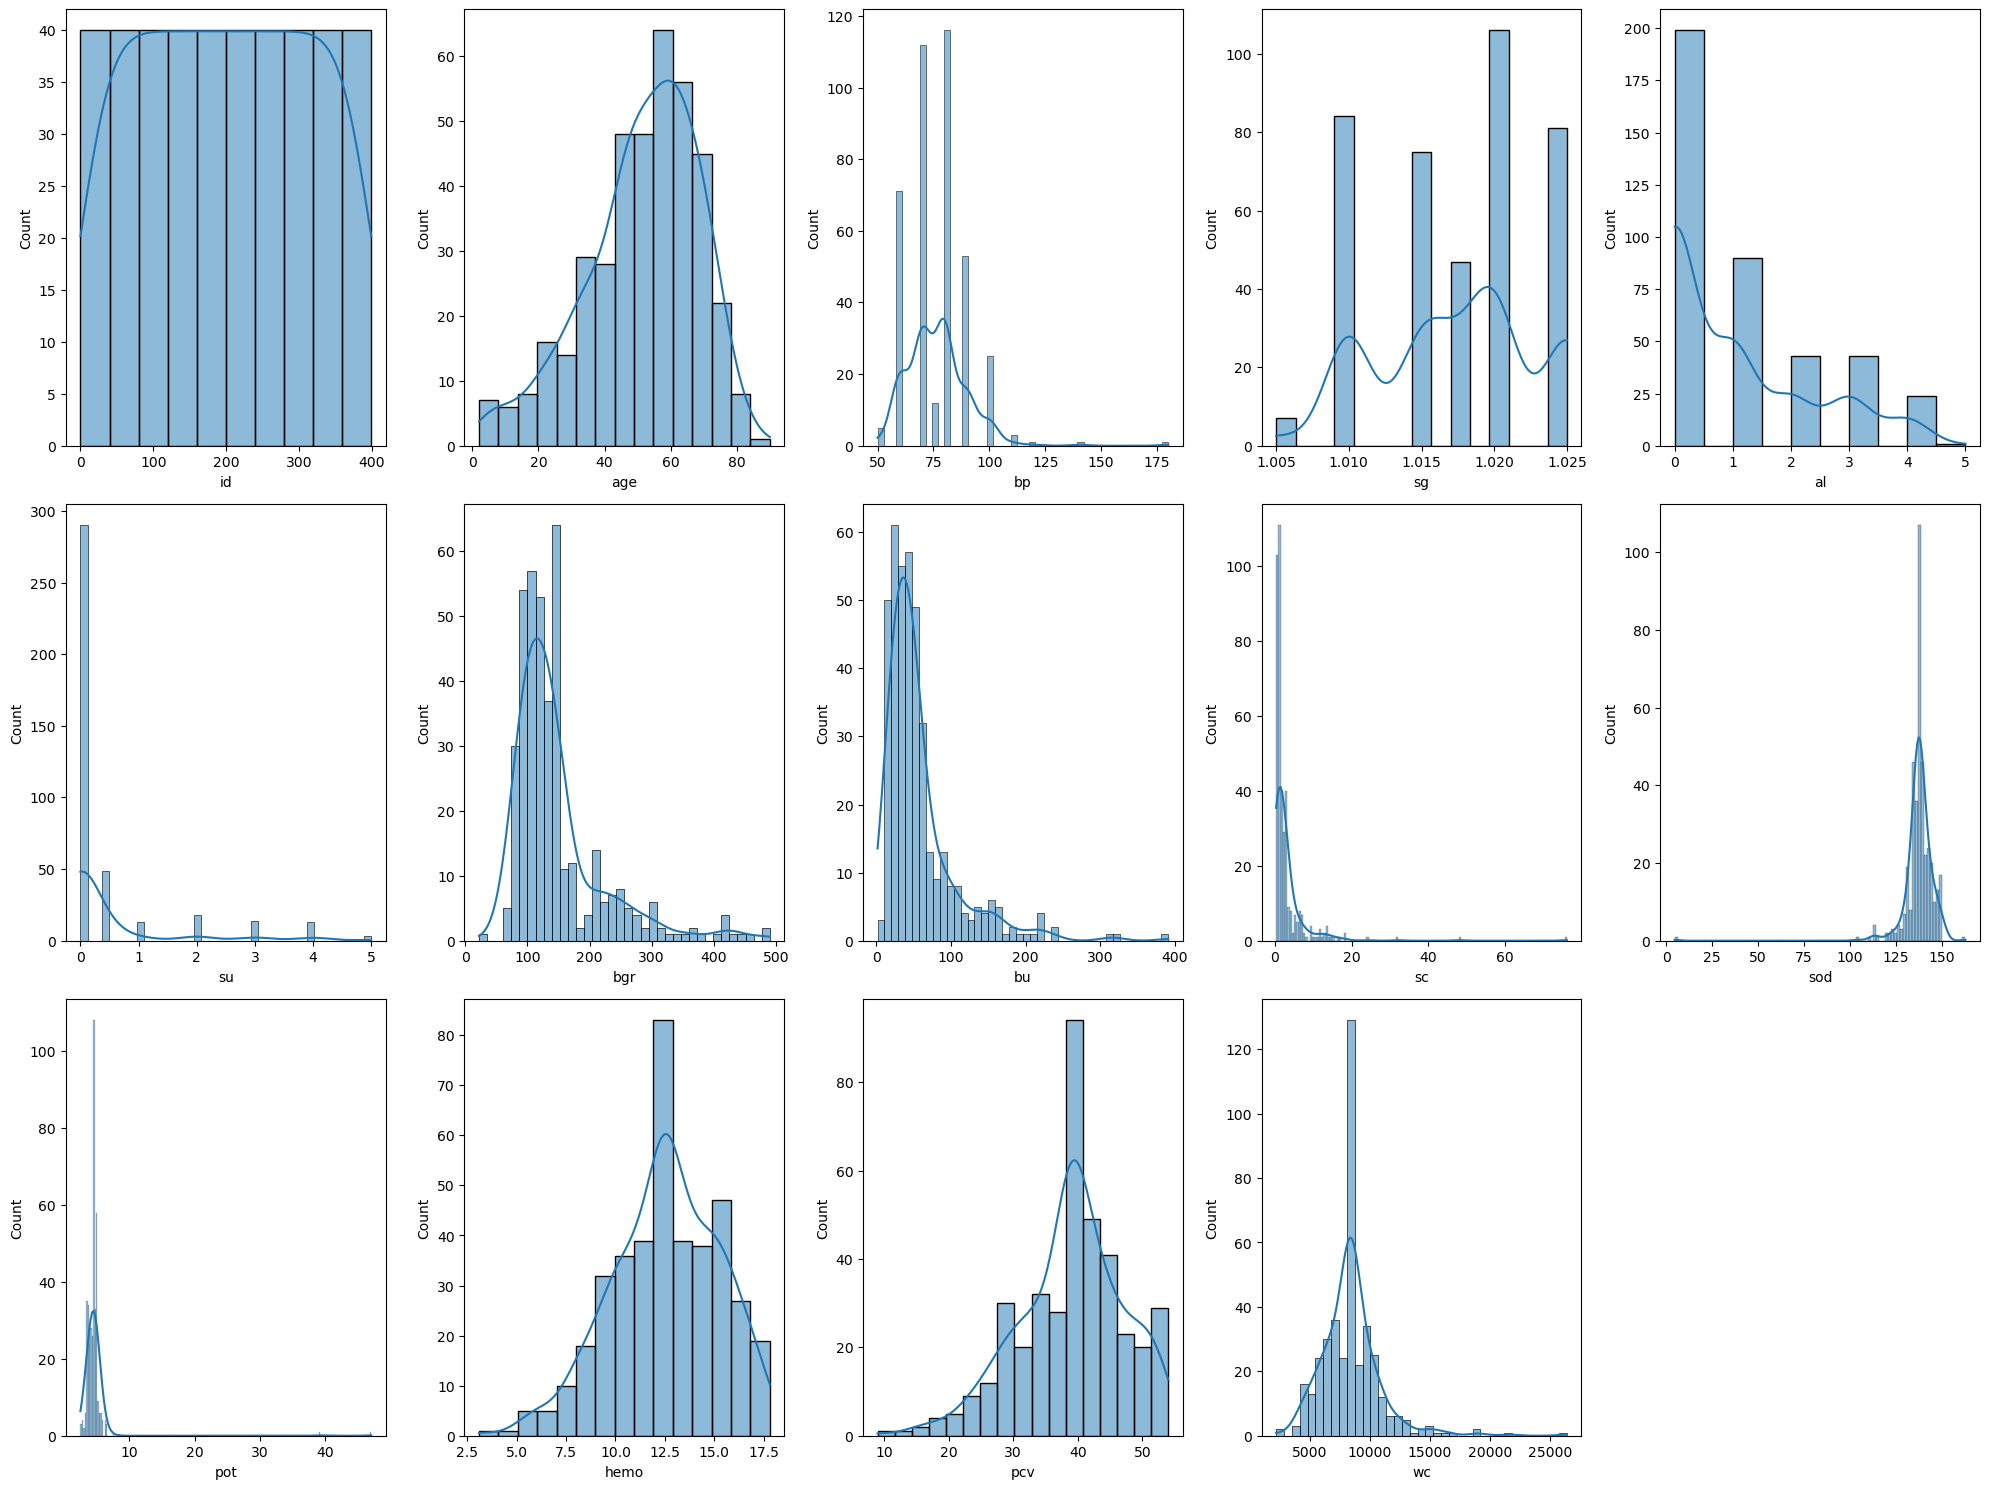

In [3]:
# checking numerical features distribution
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in data1:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.histplot(data1[column], kde=True)
        plt.xlabel(column)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()



In [3]:
cat_data=data2.drop('id', axis=1)

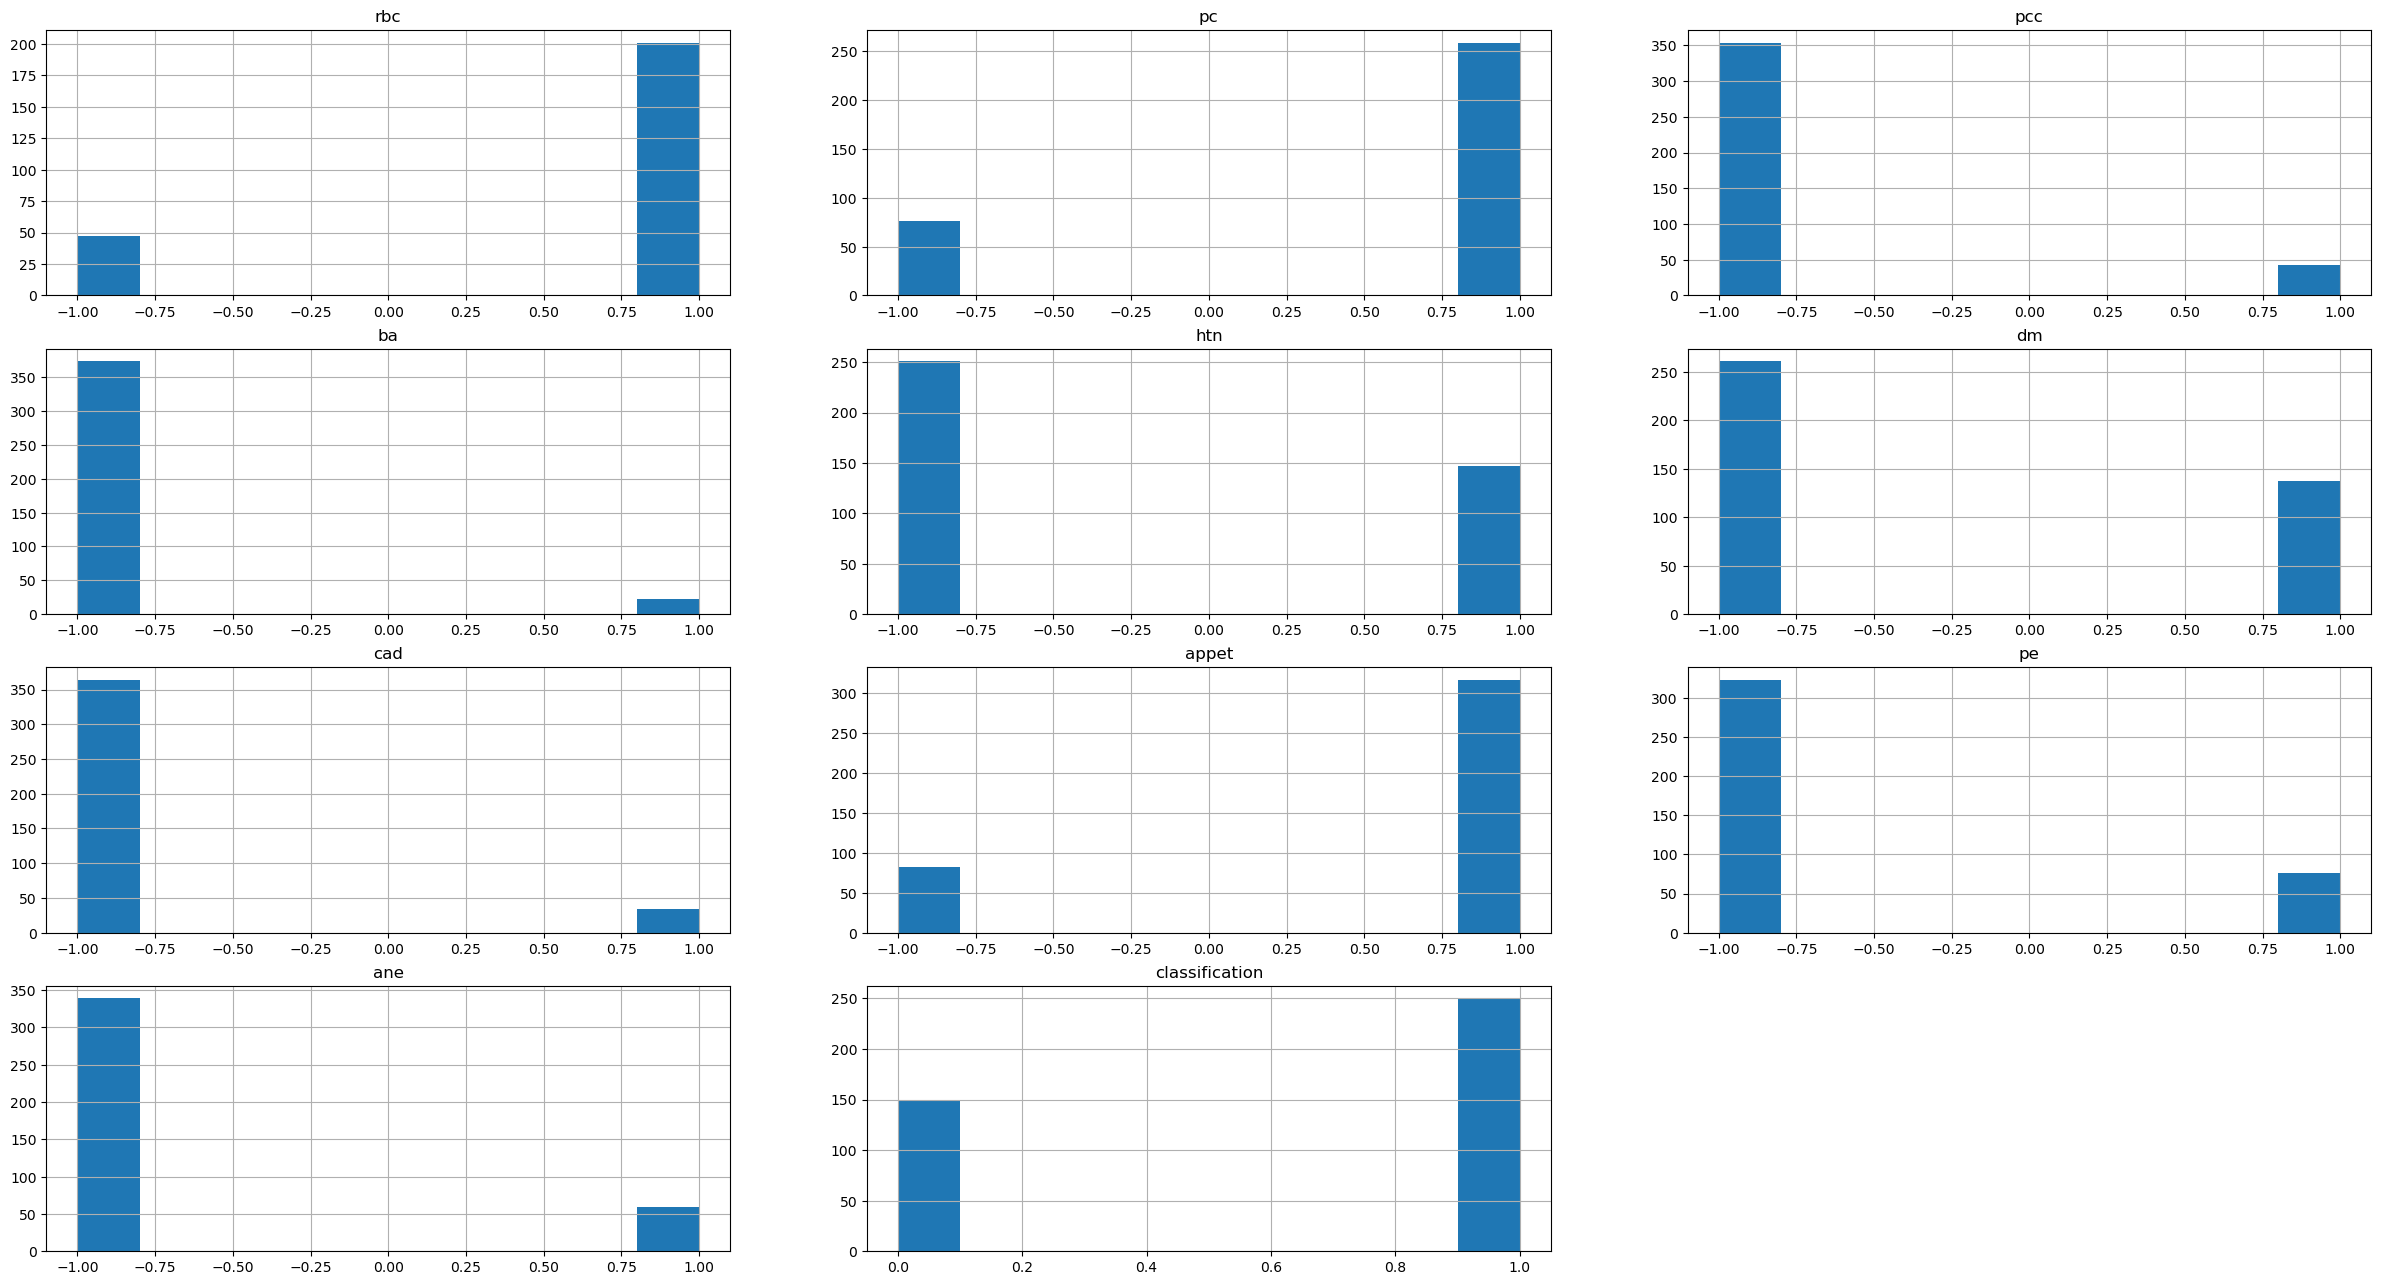

In [20]:
cat_data=data2.drop('id', axis=1)
 cat_data.replace(to_replace=['-1'], value=['0'])
plt.figure(figsize=(30,20))
for i,feature in enumerate(cat_data):
    plt.subplot(5,3,i+1)
    cat_data[feature].hist()
    plt.title(feature)

In [4]:
df = data1.merge(right = data2, on = 'id', how = 'inner')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             400 non-null    float64
 2   bp              400 non-null    float64
 3   sg              400 non-null    float64
 4   al              400 non-null    float64
 5   su              400 non-null    float64
 6   bgr             400 non-null    float64
 7   bu              400 non-null    float64
 8   sc              400 non-null    float64
 9   sod             400 non-null    float64
 10  pot             400 non-null    float64
 11  hemo            400 non-null    float64
 12  pcv             400 non-null    float64
 13  wc              400 non-null    float64
 14  rc              400 non-null    float64
 15  rbc             248 non-null    float64
 16  pc              335 non-null    float64
 17  pcc             396 non-null    flo

In [13]:
df.head()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,...,pc,pcc,ba,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,121.000000,36.0,1.2,137.528754,...,1.0,-1.0,-1.0,1.0,1.0,-1.0,1.0,-1.0,-1.0,1
1,1,7.0,50.0,1.020,4.0,0.0,148.036517,18.0,0.8,137.528754,...,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,1
2,2,62.0,80.0,1.010,2.0,3.0,423.000000,53.0,1.8,137.528754,...,1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,1
3,3,48.0,70.0,1.005,4.0,0.0,117.000000,56.0,3.8,111.000000,...,-1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,1
4,4,51.0,80.0,1.010,2.0,0.0,106.000000,26.0,1.4,137.528754,...,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,1


In [5]:
df.isnull().sum(axis=0)

id                  0
age                 0
bp                  0
sg                  0
al                  0
su                  0
bgr                 0
bu                  0
sc                  0
sod                 0
pot                 0
hemo                0
pcv                 0
wc                  0
rc                  0
rbc               152
pc                 65
pcc                 4
ba                  4
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [6]:
df = df.drop('rbc', axis=1)
df = df.drop('pc', axis=1)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             400 non-null    float64
 2   bp              400 non-null    float64
 3   sg              400 non-null    float64
 4   al              400 non-null    float64
 5   su              400 non-null    float64
 6   bgr             400 non-null    float64
 7   bu              400 non-null    float64
 8   sc              400 non-null    float64
 9   sod             400 non-null    float64
 10  pot             400 non-null    float64
 11  hemo            400 non-null    float64
 12  pcv             400 non-null    float64
 13  wc              400 non-null    float64
 14  rc              400 non-null    float64
 15  pcc             396 non-null    float64
 16  ba              396 non-null    float64
 17  htn             398 non-null    flo

In [7]:
df = df.dropna(axis = 0, how = 'any')

In [8]:
df.isnull().sum(axis=0)

id                0
age               0
bp                0
sg                0
al                0
su                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
pcc               0
ba                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

# L'Analyse en Composantes Principales 

In [9]:
df = df.drop('id', axis=1)

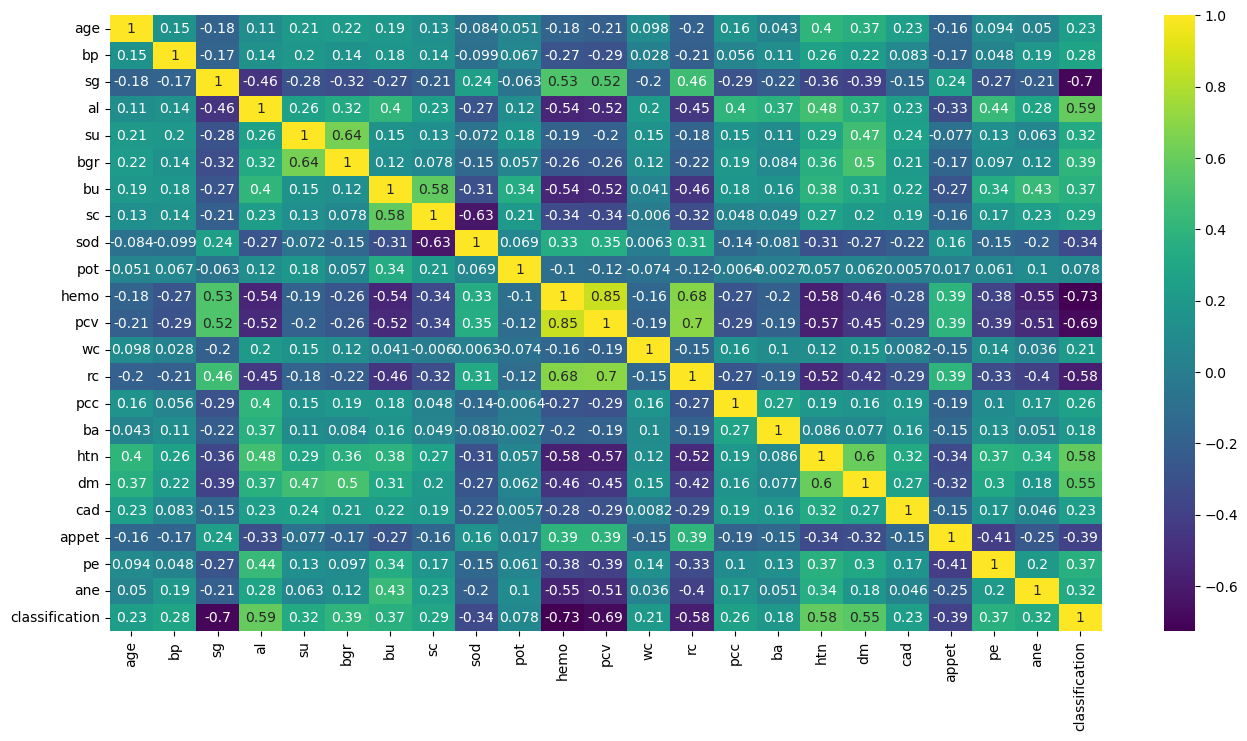

In [10]:
plt.figure(figsize = (16 , 8))
sns.heatmap(df.corr() ,annot = True ,cmap='viridis')
plt.show()


In [11]:
y = df['classification']
y.value_counts()

classification
1    250
0    143
Name: count, dtype: int64

In [13]:
df2= df.drop('classification', axis=1)

In [46]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()

norm = sc.fit_transform(df2)


In [47]:
from sklearn.decomposition import PCA

model = PCA()

coord_acp = model.fit_transform(norm)


Les valeurs propres sont : [6.65662358 1.86342296 1.5285658  1.22049343 1.20217787 1.0333663
 1.00449834 0.90370283 0.88465476 0.75579134 0.7258469  0.6424025
 0.59860792 0.5182704  0.43290141 0.41086135 0.38584303 0.33440302
 0.30641317 0.28832886 0.22129292 0.13765377]


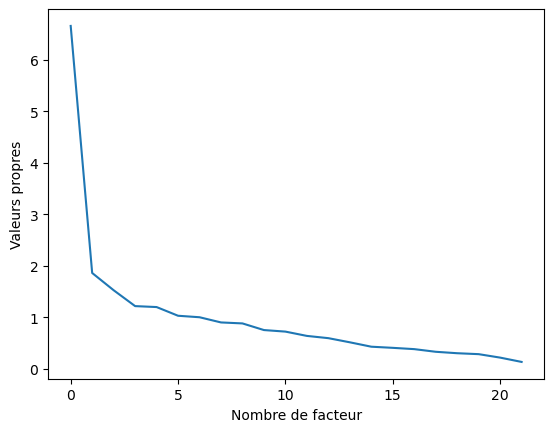

In [48]:
print('Les valeurs propres sont :', model.explained_variance_)

plt.plot(np.arange(0, 22), model.explained_variance_)
plt.xlabel('Nombre de facteur')
plt.ylabel('Valeurs propres');


Le ratio de la variance expliquée est : [0.30180389 0.08448552 0.06930347 0.05533581 0.0545054  0.04685168
 0.04554283 0.04097288 0.04010926 0.03426674 0.03290909 0.02912581
 0.02714022 0.0234978  0.01962727 0.018628   0.01749369 0.01516146
 0.01389243 0.01307251 0.01003317 0.00624107]


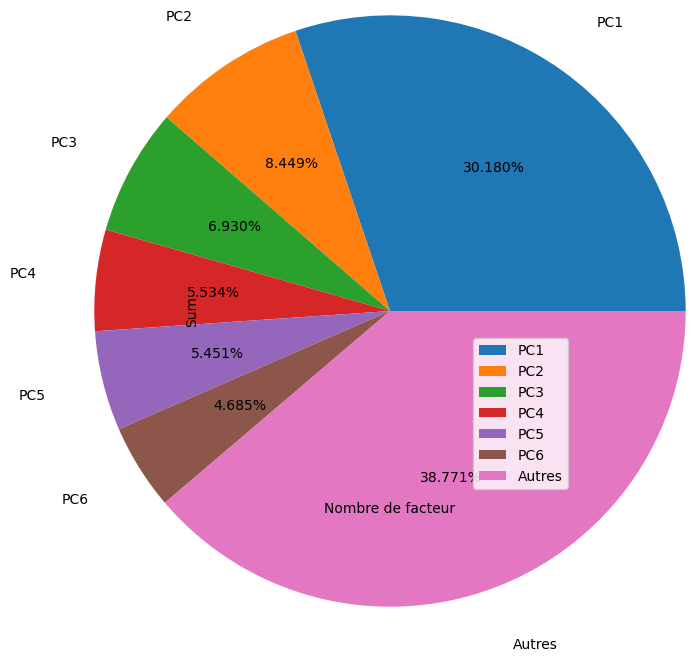

In [49]:
print('Le ratio de la variance expliquée est :', model.explained_variance_ratio_)


plt.plot(np.arange(0, 22), np.cumsum(model.explained_variance_ratio_))
plt.xlabel('Nombre de facteur')
plt.ylabel('Sum');



L1 = list(model.explained_variance_ratio_[0:6])
L1.append(sum(model.explained_variance_ratio_[6:22]))


plt.pie(L1, labels=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6','Autres'],
        autopct='%1.3f%%', radius=2, labeldistance=1.2)
plt.legend();


In [50]:
from sklearn.decomposition import PCA
print("Explained Variance for Each Principal Component:")
print(model.explained_variance_)
print(model.explained_variance_ratio_)

Explained Variance for Each Principal Component:
[6.65662358 1.86342296 1.5285658  1.22049343 1.20217787 1.0333663
 1.00449834 0.90370283 0.88465476 0.75579134 0.7258469  0.6424025
 0.59860792 0.5182704  0.43290141 0.41086135 0.38584303 0.33440302
 0.30641317 0.28832886 0.22129292 0.13765377]
[0.30180389 0.08448552 0.06930347 0.05533581 0.0545054  0.04685168
 0.04554283 0.04097288 0.04010926 0.03426674 0.03290909 0.02912581
 0.02714022 0.0234978  0.01962727 0.018628   0.01749369 0.01516146
 0.01389243 0.01307251 0.01003317 0.00624107]


In [19]:


eig = pd.DataFrame(
    {
        "Dimension" : ["Dim" + str(x + 1) for x in range(22)], 
        "Variance expliquée" : model.explained_variance_,
        "% variance expliquée" : np.round(model.explained_variance_ratio_ * 100),
        "% cum. var. expliquée" : np.round(np.cumsum(model.explained_variance_ratio_) * 100)
    }
)
eig



,Dimension,Variance expliquée,% variance expliquée,% cum. var. expliquée
0,Dim1,6.656624,30.0,30.0
1,Dim2,1.863423,8.0,39.0
2,Dim3,1.528566,7.0,46.0
3,Dim4,1.220493,6.0,51.0
4,Dim5,1.202178,5.0,57.0
5,Dim6,1.033366,5.0,61.0
6,Dim7,1.004498,5.0,66.0
7,Dim8,0.903703,4.0,70.0
8,Dim9,0.884655,4.0,74.0
9,Dim10,0.755791,3.0,77.0


In [51]:
acp_data = pd.DataFrame({'AXE 1': coord_acp[:, 0], 'AXE 2': coord_acp[:, 1], 'Target': y})

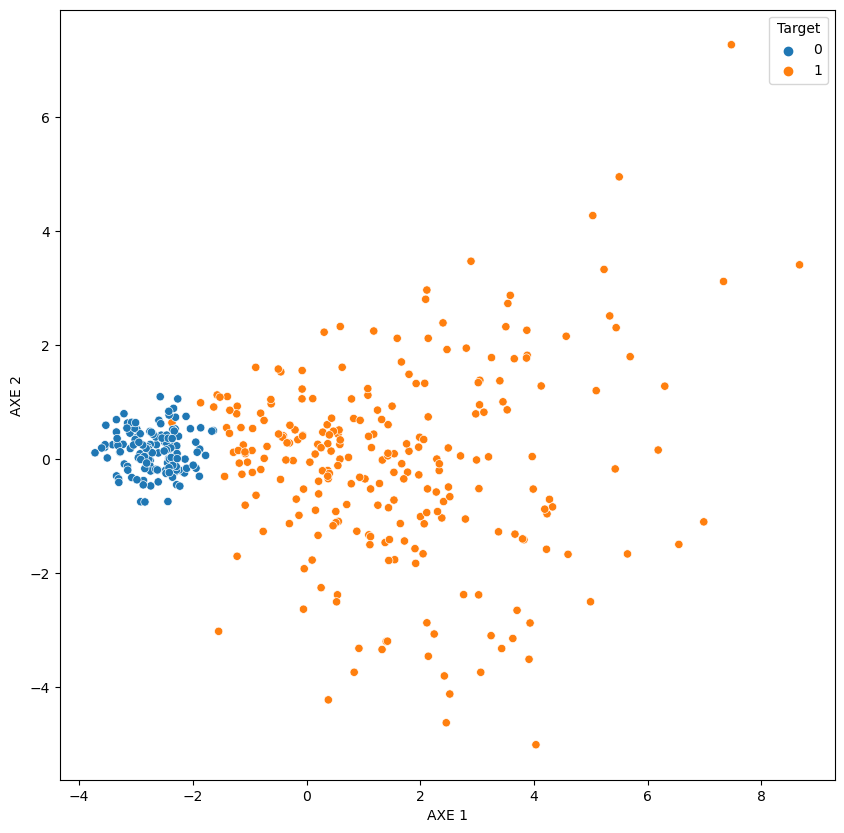

In [52]:
plt.figure(figsize=(10, 10))

sns.scatterplot(x='AXE 1', y='AXE 2', hue='Target', data=acp_data);


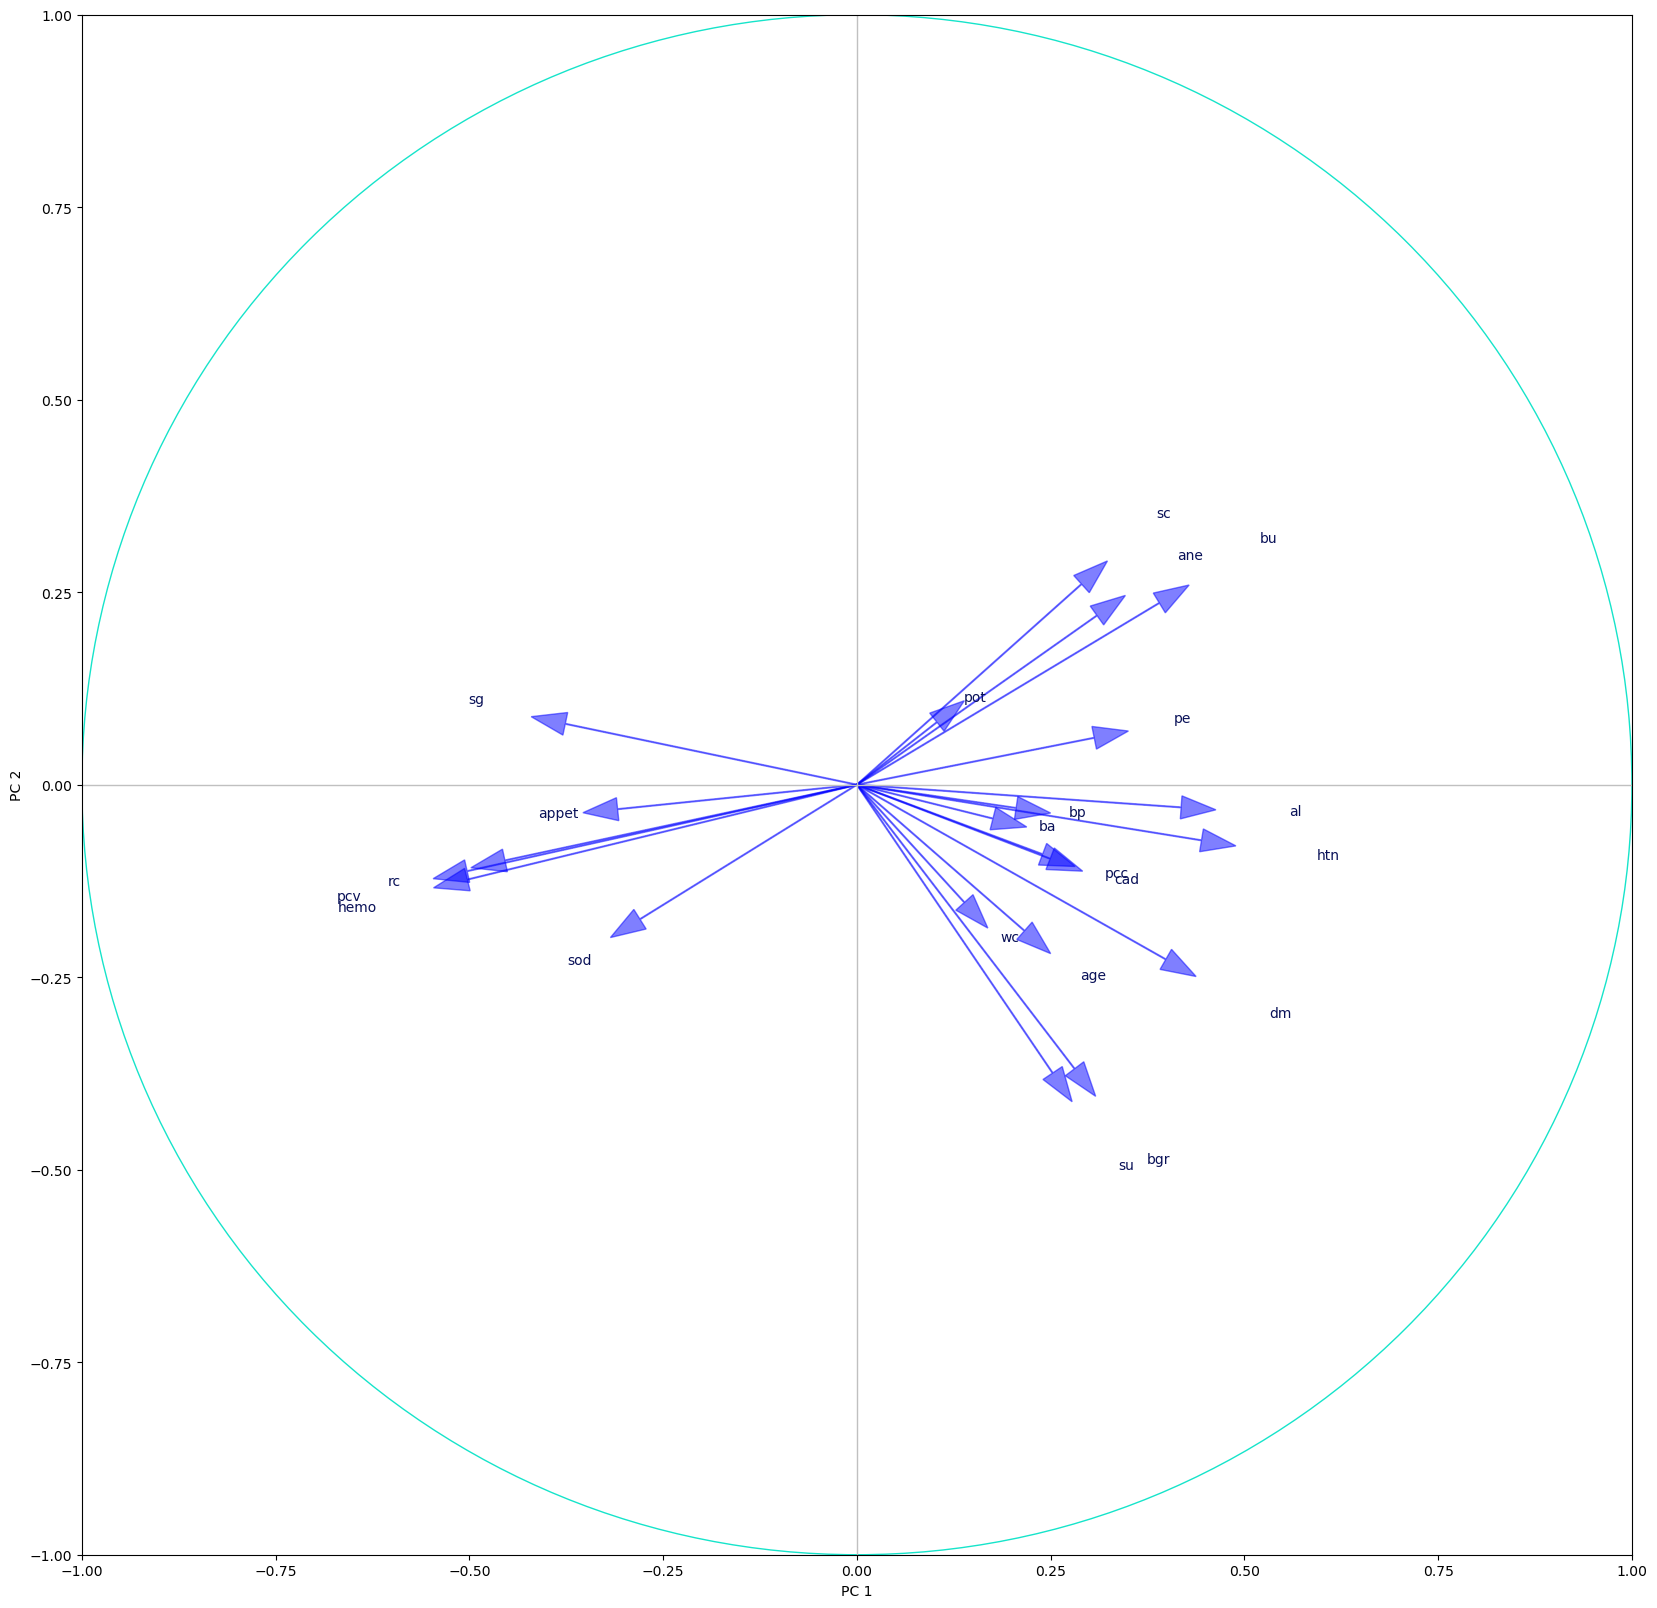

In [53]:
size = len(df2.columns)
racine_valeurs_propres = np.sqrt(model.explained_variance_)
corvar = np.zeros((size, size))

for k in range(size):

    corvar[:, k] = model.components_.T[:, k] * racine_valeurs_propres[k]     

# Délimitation de la figure
fig, axes = plt.subplots(figsize=(20, 20))
axes.set_xlim(-1, 1)
axes.set_ylim(-1, 1)

for j in range(size):
        plt.annotate(df.columns[j],(corvar[j,0]*0.8,corvar[j,1]*0.8),color='#091158')
        plt.arrow(0,0,corvar[j,0]*0.6,corvar[j,1]*0.6, alpha=0.5, head_width=0.03,color='b' )

plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

cercle = plt.Circle((0,0),1,color='#16E4CA',fill=False)
axes.add_artist(cercle)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()


In [54]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(coord_acp)  #Ajustons le modèle au données coord_acp.
y_kmeans = kmeans.predict(coord_acp) #Récupération les predictions réalisées par l'algorithme
y_kmeans

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


array([0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

<Axes: xlabel='AXE 1', ylabel='AXE 2'>

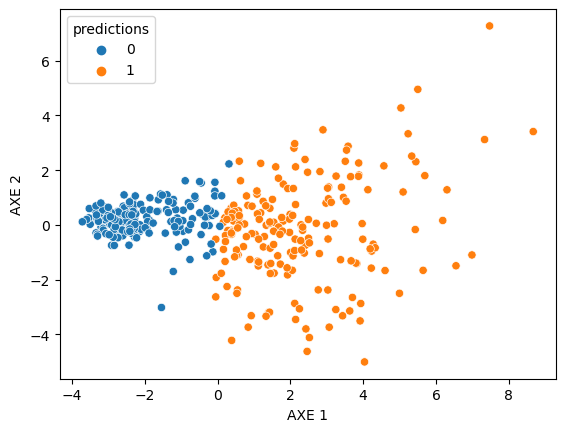

In [55]:
data2=pd.DataFrame({'AXE 1': coord_acp[:, 0], 'AXE 2': coord_acp[:, 1], 'predictions': y_kmeans})
sns.scatterplot(x='AXE 1',y='AXE 2',hue='predictions',data=data2)


In [25]:
unique_elements, counts_elements = np.unique(y_kmeans, return_counts=True)
print("Le nombre de patients appartenant à chacun des groupes:")
print(np.asarray((unique_elements, counts_elements)))

Le nombre de patients appartenant à chacun des groupes:
[[  0   1]
 [189 204]]


In [56]:
data2.predictions.value_counts()

predictions
0    204
1    189
Name: count, dtype: int64

Nous voyons ici que les deux classes de notre variable target (qui prend comme modalités '0 : Malade' et '1 : Sain') semblent être distinctes. On a donc une bonne représentation de nos variables grâce à l'ACP.
Cependant, on aimerait avoir une représentation encore plus précise de nos données car plus le nombre de variables explicatives augmente, moins la représentation sera bonne.
On va alors s'intéresser à un autre type d'algorithme de réduction de dimension : T-SNE (pour t-distributed stochastic neighbor embedding).

In [57]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state = 0, n_components = 2 )
coord_TSNE = tsne.fit_transform(norm)
data_tnse = pd.DataFrame({'AXE 1': coord_TSNE[:, 0], 'AXE 2': coord_TSNE[:, 1], 'Target': y})

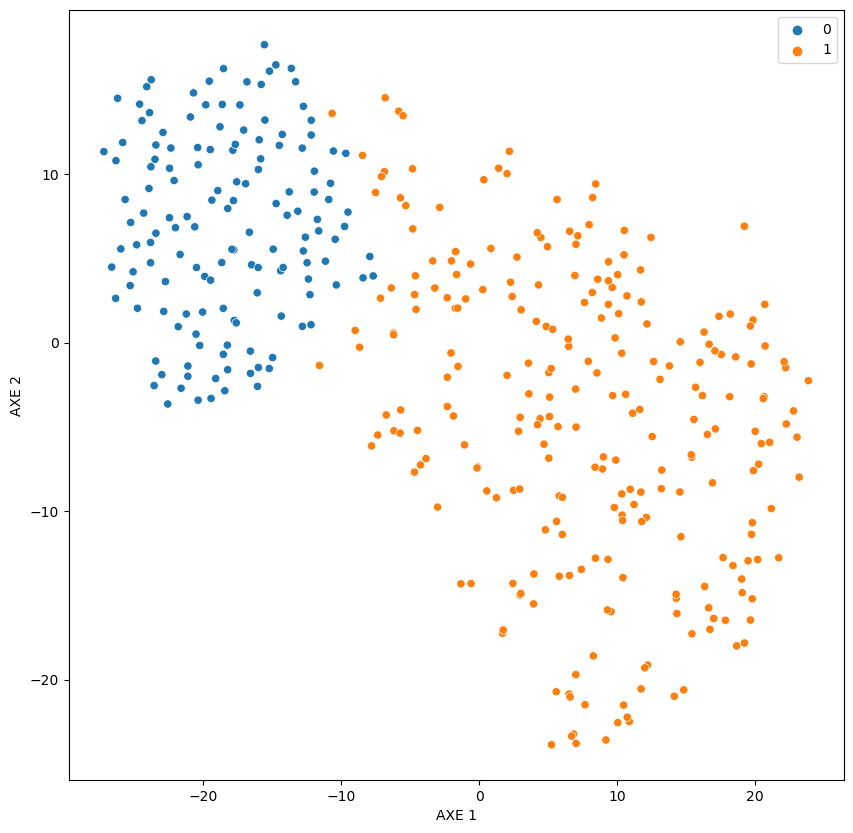

In [58]:
plt.figure(figsize=(10, 10))

sns.scatterplot(x='AXE 1', y='AXE 2', hue='Target', data=data_tnse);

 
plt.legend(loc='best');


In [28]:
from sklearn.metrics import silhouette_score

silhouette_avg1 = silhouette_score(coord_acp, y_kmeans)
print(f"Silhouette Score: {silhouette_avg1}")

Silhouette Score: 0.24855135750581955


In [69]:
from sklearn.cluster import KMeans
kmeans_tsne = KMeans(n_clusters=2)
kmeans_tsne.fit(coord_TSNE)
y_kmeans2 = kmeans_tsne.fit_predict(coord_TSNE)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

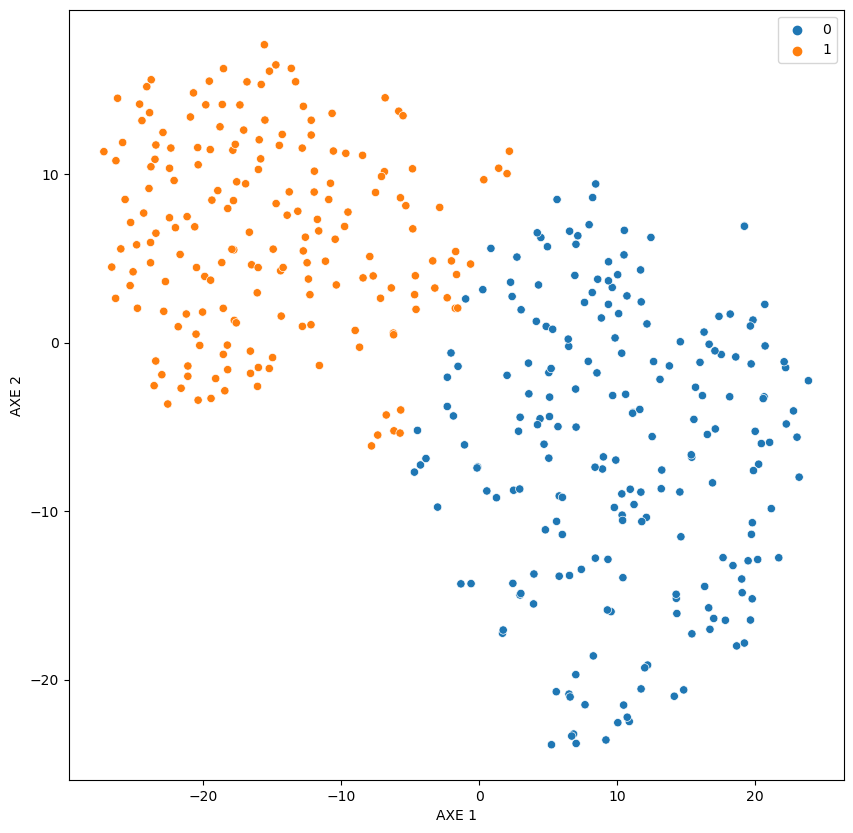

In [70]:
data3=pd.DataFrame({'AXE 1': coord_TSNE[:, 0], 'AXE 2': coord_TSNE[:, 1], 'Target': y_kmeans2})
plt.figure(figsize=(10, 10))
sns.scatterplot(x='AXE 1', y='AXE 2', hue='Target', data=data3);
plt.legend(loc='best');


In [74]:
unique_elements, counts_elements = np.unique(y_kmeans2, return_counts=True)
print("Le nombre de personnes malades (0) et non malades (1) obtenu par le K-Means:")
print(np.asarray((unique_elements, counts_elements)))

Le nombre de personnes malades (0) et non malades (1) obtenu par le K-Means:
[[  0   1]
 [208 185]]


In [75]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(coord_TSNE, y_kmeans2)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.5504685640335083


Les résultats obtenus avec le T-SNE semblent être meilleurs que ceux obtenus lors de l'ACP.
Les deux groupes de personnes malades ou non sont un peu plus distanciés, mais on aimerait avoir une distinction clairement visible sans coloration des coordonnées.
